<a id=1000></a>
# [Loading Dataset]()

# [Basic EDA]()


# 3: [Applying different vectorization Technique](#3)

## 3.1: [TF-IDF Vectorizer](#3.1)
#### 3.1.1: [KNN & its performance Metrics](#3.1.1)
#### 3.1.2: [NB & its performance Metrics](#3.1.2)
#### 3.1.3: [LR & its performance Metrics](#3.1.3)
#### 3.1.4: [DT & its performance Metrics](#3.1.4)   
#### 3.1.5: [RF & its performance Metrics](#3.1.5)
#### 3.1.6: [SVM & its performance Metrics](#3.1.6)



# D: [accuracy chart--after TF-IDF Vectorizer](#D)

## 3.2: [Word2vec using pre-trained model----'glove-twitter-200' ](#3.2)
#### 3.2.1: [KNN & its performance Metrics](#3.2.1)
#### 3.2.2: [NB & its performance Metrics](#3.2.2)
#### 3.2.3: [LR & its performance Metrics](#3.2.3)
#### 3.2.4: [DT & its performance Metrics](#3.2.4)   
#### 3.2.5: [RF & its performance Metrics](#3.2.5)
#### 3.2.6: [SVM & its performance Metrics](#3.2.6)


# E: [accuracy chart--after Word2vec Vectorizer](#E)



# Packeges:

In [1]:
# packeges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Text vectorizer packeges.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec


# modeling related packeges
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Text Pre-processing packeges
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('omw-1.4')
#nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import gensim
import gensim.downloader as api
from gensim.models import KeyedVectors
from wordcloud import WordCloud


#performance related metircs
from sklearn.metrics import roc_auc_score,roc_curve, auc,accuracy_score
from sklearn.metrics import confusion_matrix




In [2]:
# loading dataset
df=pd.read_excel("EmotionDescription.xlsx")

In [4]:
#Basic EDA
print(df.shape)

print("="*100)

print(df.columns)

print("="*100)

print(df.isnull().sum())
print("="*100)
df.head(10)

(7666, 2)
Index(['Target', 'Text'], dtype='object')
Target    0
Text      0
dtype: int64


,Target,Text
0,anger,When a boy tried to fool me so he would be OK ...
1,anger,I felt anger when I saw that I was being misle...
2,anger,Once a friend had pushed me and I had fallen o...
3,anger,When I was misleaded by a person who assured t...
4,anger,I don't use to lie to my parets about what I d...
5,anger,During the short period of my unemployment abo...
6,anger,When my chief accused me of an error that I ha...
7,anger,A girl entered in the division where I work an...
8,anger,"When I was dancing with a dame at a social, on..."
9,anger,My mother was ill and asked me to prpare our l...


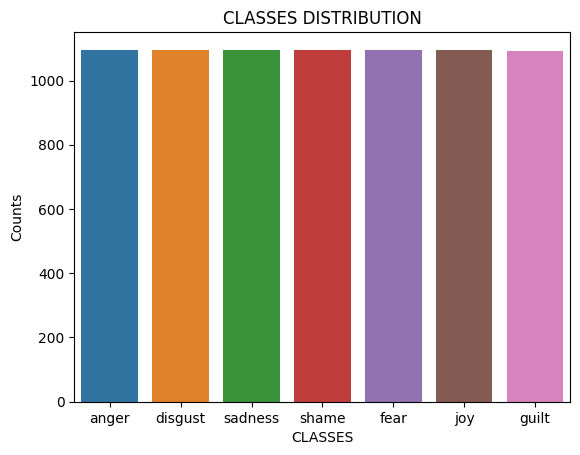

In [7]:
#Classes Distribution
value_indexs=df.Target.value_counts().index
values_Counts=df.Target.value_counts()

sns.barplot(x=value_indexs,y=values_Counts)
plt.xlabel("CLASSES")
plt.ylabel("Counts")
plt.title("CLASSES DISTRIBUTION")
plt.show()

 Obeservation:
 
 The dataset is not imblanced every class datapoints in approximately equal number of points. 
 
 We have seven Classes.
 
 

In [8]:
#models=["KNN","NB","LR","DT","RF","SVM"]
#overAll_Train_accuracy=[]
#overAll_Test_accuracy=[]


#Separating the traget classes
y_df=pd.DataFrame(df["Target"])
final_df=df.drop("Target",axis=1)


#Encodeing the target variable
y_df['Target']=y_df['Target'].map({'anger':0,'disgust':1,'sadness':2,'shame':3,'fear':4,'joy':5,'guilt':6})

y_df=np.array(y_df)
y_df = np.ravel(y_df)

In [9]:
#vectorizing the text of whole corpus Throug BOW count vecterizor


# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Vectorize the corpus
vectorized_data = vectorizer.fit_transform(final_df['Text'])

vectorized_data

<7666x8934 sparse matrix of type '<class 'numpy.int64'>'
	with 129343 stored elements in Compressed Sparse Row format>

In [10]:
#spliting the data into train, test sets
X_train, X_test, y_train, y_test = train_test_split(vectorized_data, y_df, test_size=0.20,random_state=42)

#spliting the train test into train and cross-validation sets
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20)

# 3: [Applying different vectorization Technique](#1000)

<a id=3></a>


## 3.1: [TF-IDF Vectorizer](#1000)
<a id=3.1></a>

In [17]:

#models=["KNN","NB","LR","DT","RF","SVM"]
#overAll_Train_accuracy=[]
#overAll_Test_accuracy=[]
# loading dataset
df=pd.read_excel("EmotionDescription.xlsx")

# Separating the traget classes
y_df=pd.DataFrame(df["Target"])
final_df=df.drop("Target",axis=1)



#Encodeing the target variable
y_df['Target']=y_df['Target'].map({'anger':0,'disgust':1,'sadness':2,'shame':3,'fear':4,'joy':5,'guilt':6})
y_df=np.array(y_df)
y_df = np.ravel(y_df)



# user define function definition to clean and preprocess the Text apply every technique.

def Text_cleaner(df):
    # Tokenize each tweet
    df['Text'] = df['Text'].apply(lambda x: word_tokenize(x.lower()))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    df['Text'] = df['Text'].apply(lambda x: [word for word in x if word not in stop_words])
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    df['Text'] = df['Text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

     # Stem the tokens
    stemmer = PorterStemmer()
    df['Text'] = df['Text'].apply(lambda x: [stemmer.stem(word) for word in x])

    # Remove special characters  in each tweet
    def remove_symbols_regex(token_list):
        pattern = r'[á!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'  
        cleaned_tokens = [re.sub(pattern, '', token) for token in token_list]
        return cleaned_tokens
    
    
    df['Text'] = df['Text'].apply(remove_symbols_regex)

    return df

# function call to clean the Text and preprocess
final_df=Text_cleaner(final_df)



#vectorizing the text of whole corpus Throug BOW count vecterizor
text_array=np.array(final_df)
text_list=text_array.tolist()


# user define function to convert whole corpus to vectors using the BOW Technique
def vectorizer(text):
    # Ensure all elements are strings
    for i in range(len(text)):
        if not isinstance(text[i], str):
             text[i] = str(text[i])

    # Create TfidfVectorizer object
    vectorizer = TfidfVectorizer()

    # Fit the vectorizer to the text
    vectorizer.fit(text)
    
    # Transform the text into TF-IDF vectors
    tfidf_vectors = vectorizer.transform(text)
        
    return tfidf_vectors

vectorized_data=vectorizer(text_list) # Function call


#spliting the data into train, test sets
X_train, X_test, y_train, y_test = train_test_split(vectorized_data, y_df, test_size=0.20,random_state=42)



In [43]:
# 3.1.1: [KNN & its performance Metrics](#1000)
#<a id=3.1.1></a>
import scipy.sparse as sp

# Assuming you have a csr_matrix called 'matrix'
matrix = sp.csr_matrix(X_test)

# Get the shape of the csr_matrix
matrix_shape = matrix.shape

# Access the dimensions of the matrix
num_rows = matrix_shape[0]
num_columns = matrix_shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 1534
Number of columns: 6343


Train_Accuracy: 61.904761904761905
Test_Accuracy: 43.67666232073012


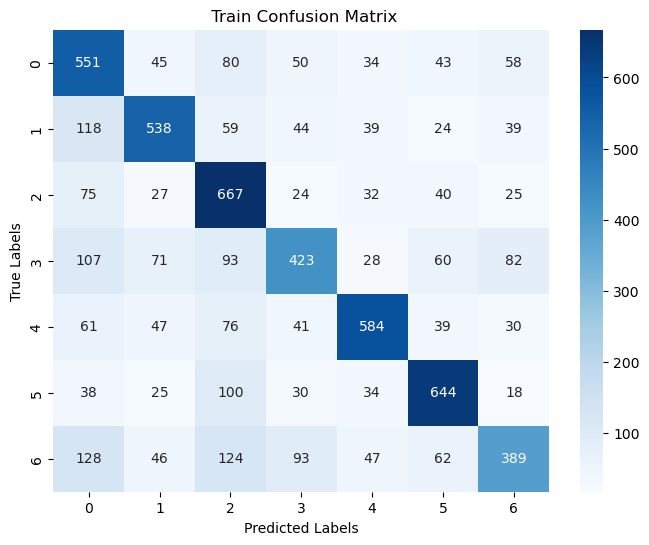

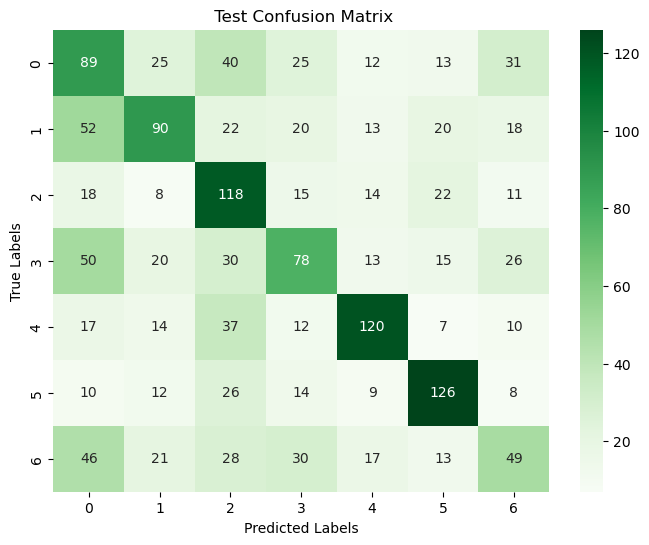

In [44]:
#creating KNN Model
clf=KNeighborsClassifier()
clf.fit(X_train, y_train)


# Calculate accuracy score
accuracy = accuracy_score(y_train,clf.predict(X_train))
print("Train_Accuracy:", accuracy*100)
overAll_Train_accuracy.append(accuracy)

print("="*100)

# Calculate accuracy score
accuracy = accuracy_score(y_test,clf.predict(X_test))
print("Test_Accuracy:", accuracy*100)
overAll_Test_accuracy.append(accuracy)
print("="*100)



#comfusion metric of Train set
cm = confusion_matrix(y_train, clf.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 3.1.2: [NB & its performance Metrics](#1000)
<a id=3.1.2></a>


Accuracy: 76.45140247879974
Accuracy: 55.14993481095176


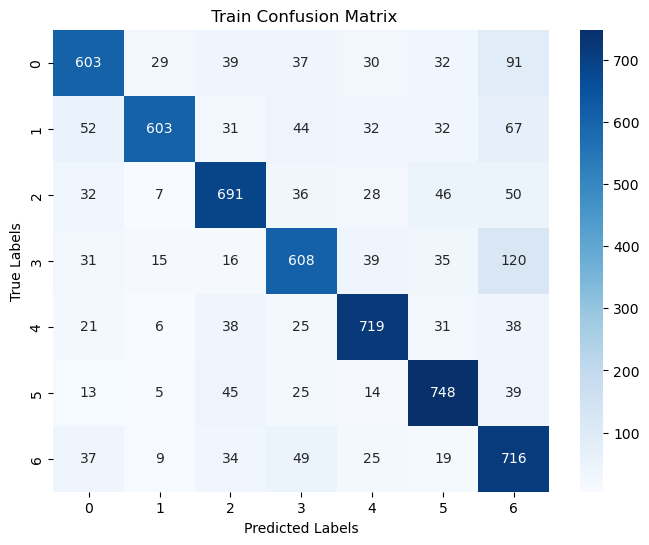

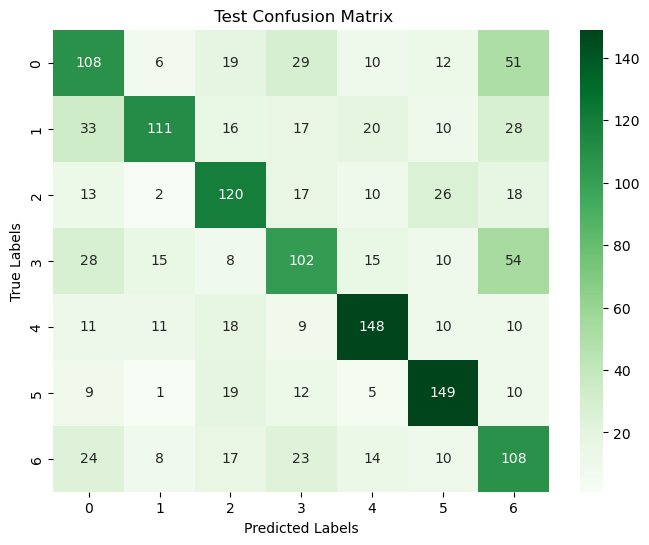

In [45]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

# Calculate accuracy of trian set
accuracy = accuracy_score(y_train, nb_classifier.predict(X_train))
overAll_Train_accuracy.append(accuracy)
print("Accuracy:", accuracy*100)

print("="*100)

# Calculate accuracy of trian set
accuracy = accuracy_score(y_test, nb_classifier.predict(X_test))
print("Accuracy:", accuracy*100)
overAll_Test_accuracy.append(accuracy)
print("="*100)



#comfusion metric of Train set
cm = confusion_matrix(y_train, nb_classifier.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, nb_classifier.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 3.1.3: [LR & its performance Metrics](#1000)
<a id=3.1.3></a>


Train_Accuracy: 0.7966405740378343
Test_Accuracy: 0.5782268578878749


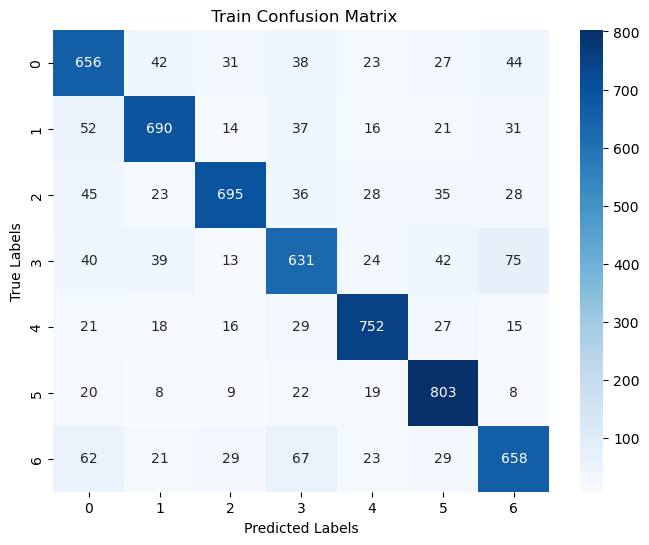

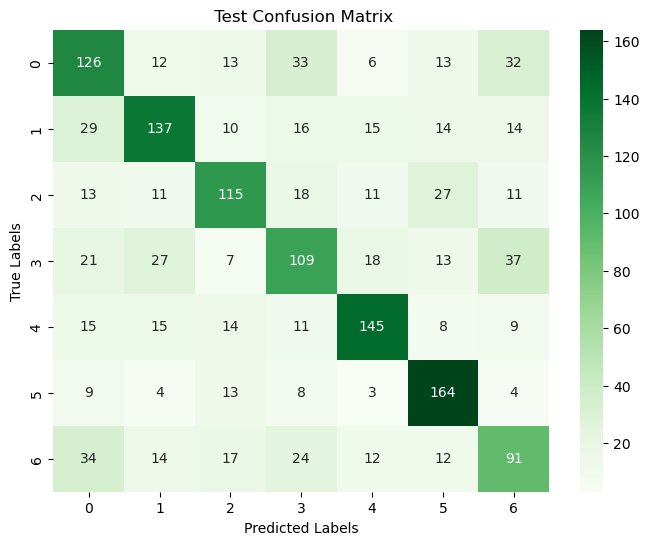

In [46]:
# Train a logistic regression model
Lr = LogisticRegression(multi_class='multinomial',solver="sag")
Lr.fit(X_train, y_train)


# Make predictions on the train set
y_pred = Lr.predict(X_train)
# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print('Train_Accuracy:', accuracy)
overAll_Train_accuracy.append(accuracy)
print("="*100)

# Calculate accuracy on Test Set
accuracy = accuracy_score(y_test, Lr.predict(X_test))
print('Test_Accuracy:', accuracy)
overAll_Test_accuracy.append(accuracy)
print("="*100)


#comfusion metric of Train set
cm = confusion_matrix(y_train, Lr.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, Lr.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()




# 3.1.4: [DT & its performance Metrics](#1000)   
<a id=3.1.4></a>


Train_Accuracy: 0.9879321591650359
Test_Accuracy: 0.43546284224250326


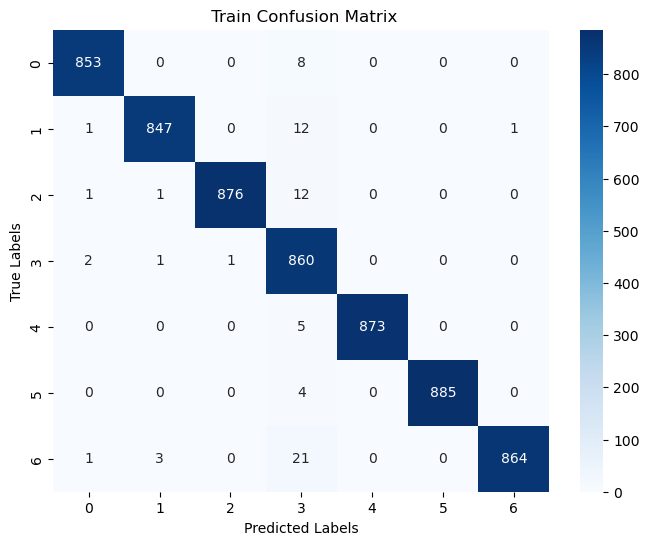

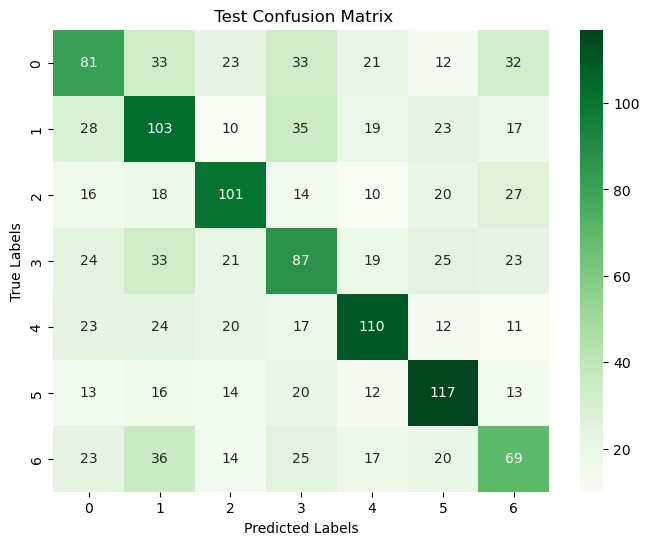

In [47]:

# Train a decision tree model
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)

# Make predictions on the Trainset
y_pred = Dt.predict(X_train)

# Calculate accuracy on Train Set
accuracy = accuracy_score(y_train, y_pred)
print('Train_Accuracy:', accuracy)
overAll_Train_accuracy.append(accuracy)
print("="*100)


# Calculate accuracy on Test Set
accuracy = accuracy_score(y_test, Dt.predict(X_test))
print('Test_Accuracy:', accuracy)
overAll_Test_accuracy.append(accuracy)

print("="*100)

#comfusion metric of Train set
cm = confusion_matrix(y_train, Dt.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, Dt.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 3.1.5: [RF & its performance Metrics](#1000)
<a id=3.1.5></a>


Train_Accuracy: 98.79321591650358
Test_Accuracy: 54.823989569752285


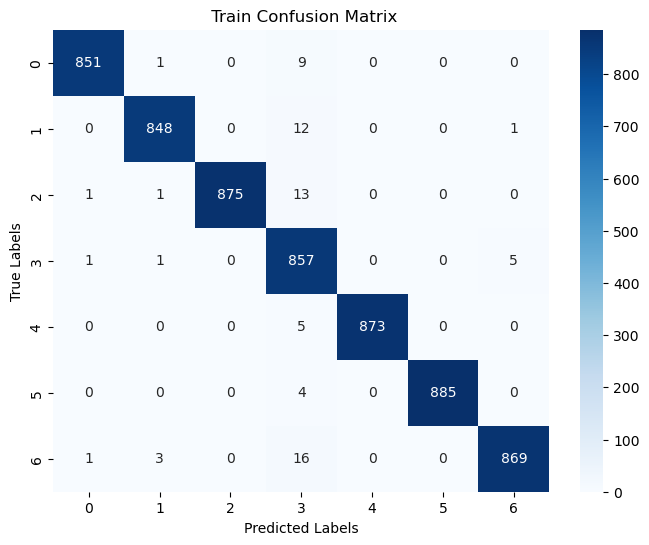

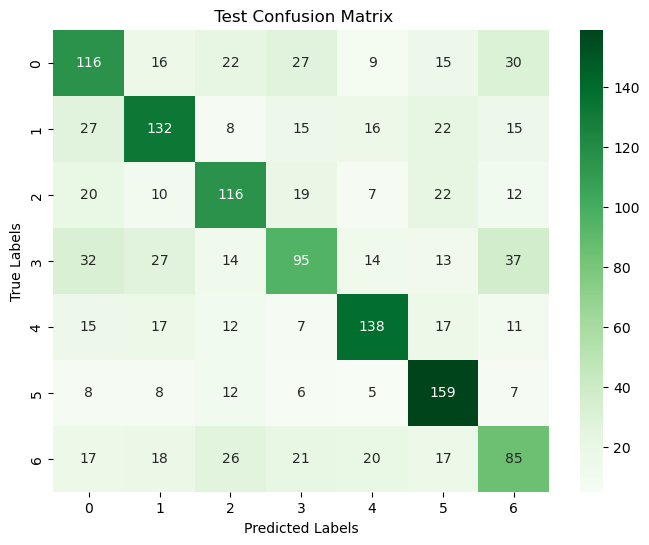

In [48]:
# Create the model
Rf = RandomForestClassifier()
# Train the model
Rf.fit(X_train, y_train)


# Evaluate the model's Train set accuracy
accuracy = accuracy_score(y_train, Rf.predict(X_train))
overAll_Train_accuracy.append(accuracy)
print("Train_Accuracy:", accuracy*100)

print("="*100)


# Evaluate the model's Test set accuracy
accuracy = accuracy_score(y_test, Rf.predict(X_test))
overAll_Test_accuracy.append(accuracy)
print("Test_Accuracy:", accuracy*100)

print("="*100)



#comfusion metric of Train set
cm = confusion_matrix(y_train, Rf.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, Rf.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# 3.1.6: [SVM & its performance Metrics](#1000)

<a id=3.1.6></a>



Train Accuracy: 0.8356164383561644
Test_Accuracy: 0.5580182529335072


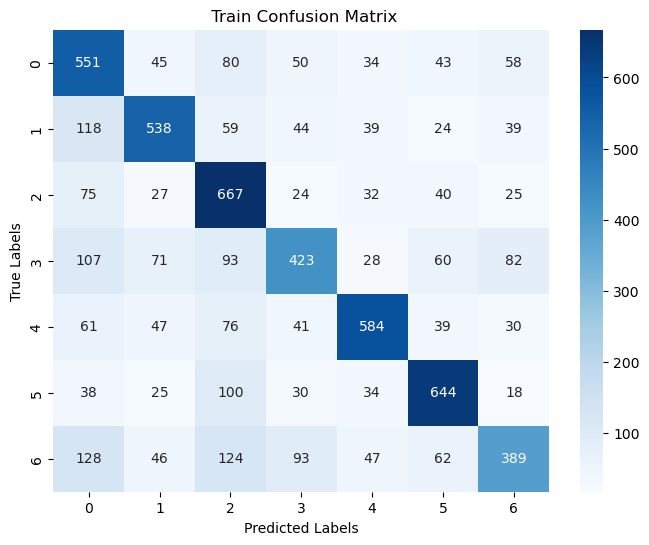

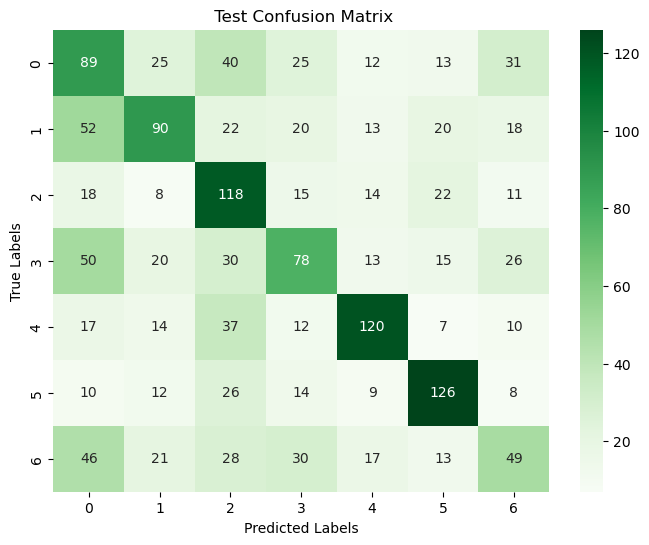

In [49]:


# Train an SVM model
Svm = SVC(kernel='linear')
Svm.fit(X_train, y_train)

# Make predictions on the train set
y_pred = Svm.predict(X_train)

# Calculate accuracy of Train Set
accuracy = accuracy_score(y_train, y_pred)
print('Train Accuracy:', accuracy)
overAll_Train_accuracy.append(accuracy)
print("="*100)

# Calculate accuracy of Test set.
accuracy = accuracy_score(y_test, Svm.predict(X_test))
print('Test_Accuracy:', accuracy)
overAll_Test_accuracy.append(accuracy)

print("="*100)




#comfusion metric of Train set
cm = confusion_matrix(y_train, clf.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# D: [accuracy chart--after TF-IDF Vectorizer](#1000)
<a id=D></a>

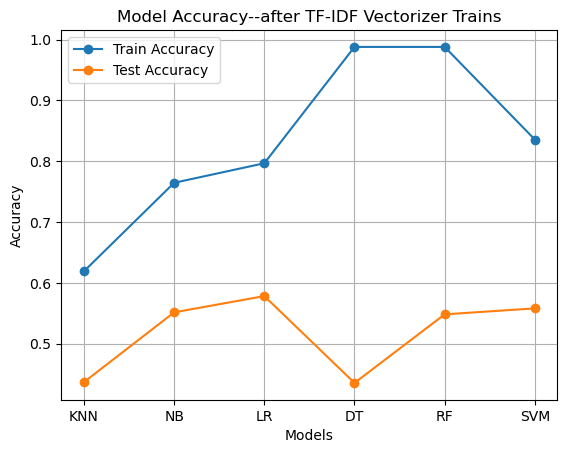

In [50]:
# Plotting the line chart
plt.plot(models, overAll_Train_accuracy, marker='o', label='Train Accuracy')
plt.plot(models, overAll_Test_accuracy, marker='o', label='Test Accuracy')

# Set the chart title and labels
plt.title('Model Accuracy--after TF-IDF Vectorizer Trains')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Add a legend
plt.grid(True)
plt.legend()

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model on the training data
gb_model.fit(X_train, y_train)

y_tr=gb_model.predict(X_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

accuracy=accuracy_score(y_train,y_tr)

print("Train accuracy is:",accuracy)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Train accuracy is: 0.7022178734507502
Accuracy on the test set: 0.5195567144719687


In [19]:
import xgboost as xgb

# Create an XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the training data
y_tr = xgb_model.predict(X_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate training accuracy
accuracy_train = accuracy_score(y_train, y_tr)
print("Train accuracy is:", accuracy_train)

# Evaluate the model's performance on the test set
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy_test)


Train accuracy is: 0.7221135029354208
Accuracy on the test set: 0.5208604954367666


# 3.2: [Word2vec using pre-trained model----'glove-twitter-200' ](#1000)
<a id=3.2></a>

In [21]:

#models=["KNN","NB","LR","DT","RF","SVM"]
#overAll_Train_accuracy=[]
#overAll_Test_accuracy=[]
# loading dataset
df=pd.read_excel("EmotionDescription.xlsx")

# Separating the traget classes
y_df=pd.DataFrame(df["Target"])
final_df=df.drop("Target",axis=1)



#Encodeing the target variable
y_df['Target']=y_df['Target'].map({'anger':0,'disgust':1,'sadness':2,'shame':3,'fear':4,'joy':5,'guilt':6})
y_df=np.array(y_df)
y_df = np.ravel(y_df)


In [22]:


wv = KeyedVectors.load('vectors.kv')
#KeyedVectors.load_word2vec_format('D:/COURSES/MACHINE_LEARNING/Engr_syed_zafar_Ali_shah/vectors.kv', binary=False)


def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res


In [23]:

# user define function definition to clean and preprocess the Text apply every technique.

def Text_cleaner(df):
    # Tokenize each tweet
    df['Text'] = df['Text'].apply(lambda x: word_tokenize(x.lower()))
    
    
    
    stop_words = set(stopwords.words('english'))
    df['Text'] = df['Text'].apply(lambda x: [word for word in x if word not in stop_words])


    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    df['Text'] = df['Text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    

    #Stem the tokens
    #stemmer = PorterStemmer()
    #df['Text'] = df['Text'].apply(lambda x: [stemmer.stem(word) for word in x])

    # Remove special characters  in each tweet
    def remove_symbols_regex(token_list):
        pattern = r'[á!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'  
        cleaned_tokens = [re.sub(pattern, '', token) for token in token_list]
        return cleaned_tokens
    
    
    df['Text'] = df['Text'].apply(remove_symbols_regex)

    return df

# function call to clean the Text and preprocess
final_df=Text_cleaner(final_df)


final_df['vec'] = final_df['Text'].apply(sent_vec)



In [24]:
X = final_df['vec'].to_list()
x1=X
X_train, X_test, y_train, y_test = train_test_split(X, y_df, test_size=0.2,stratify=y_df)


# 3.2.1: [KNN & its performance Metrics](#1000)
<a id=3.2.1></a>



Train_Accuracy: 59.6542726679713
Test_Accuracy: 40.22164276401565


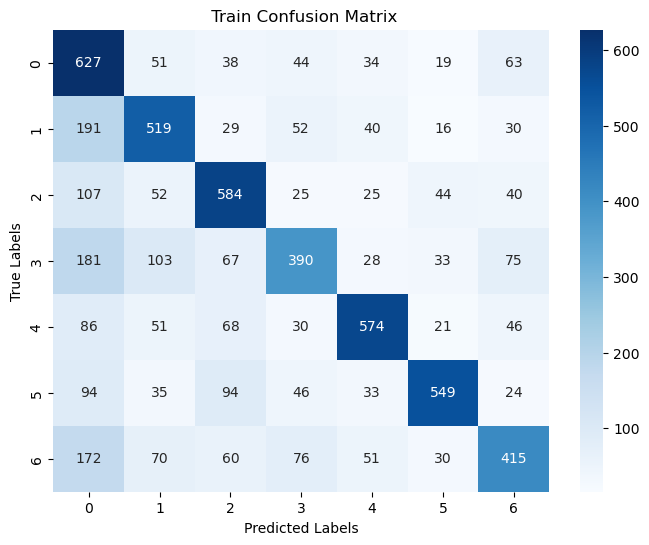

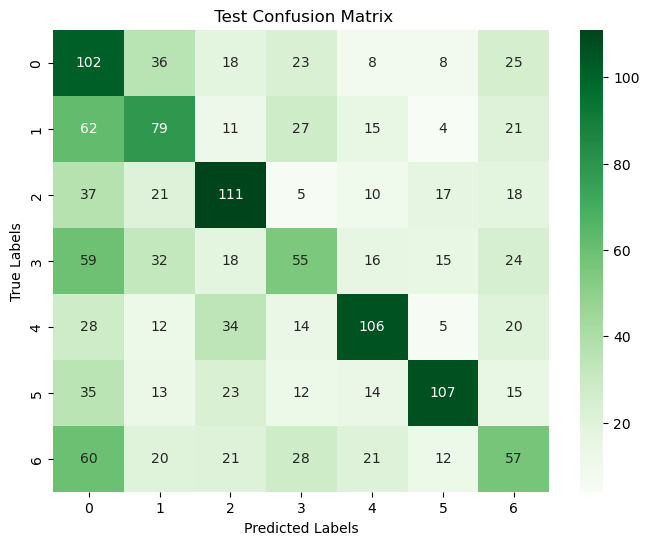

In [55]:
#creating KNN Model
clf=KNeighborsClassifier()
clf.fit(X_train, y_train)


# Calculate accuracy score
accuracy = accuracy_score(y_train,clf.predict(X_train))
print("Train_Accuracy:", accuracy*100)
overAll_Train_accuracy.append(accuracy)

print("="*100)

# Calculate accuracy score
accuracy = accuracy_score(y_test,clf.predict(X_test))
print("Test_Accuracy:", accuracy*100)
overAll_Test_accuracy.append(accuracy)
print("="*100)



#comfusion metric of Train set
cm = confusion_matrix(y_train, clf.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<a id=3.2.2></a>
# 3.2.2: [NB & its performance Metrics](#1000)


In [56]:
#x2=np.array(x1)
#x2=np.absolute(x2)
#x1=list(x2)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create an instance of the scaler
scaler = MinMaxScaler()  # or MinMaxScaler() for Min-Max scaling

# Fit the scaler to the features
scaler.fit(x1)

# Transform the features to the scaled values
X_scaled = scaler.transform(x1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_df, test_size=0.2,stratify=y_df)

Train_Accuracy: 44.12915851272016
Test_Accuracy: 43.481095176010434


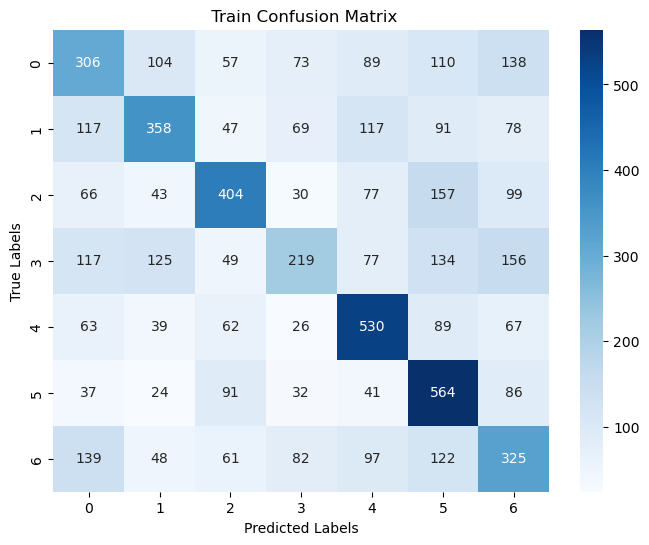

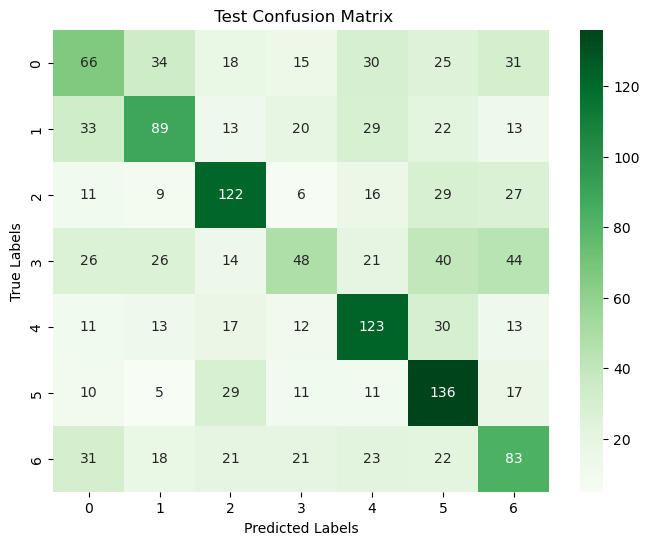

In [57]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

# Calculate accuracy of trian set
accuracy = accuracy_score(y_train, nb_classifier.predict(X_train))
overAll_Train_accuracy.append(accuracy)
print("Train_Accuracy:", accuracy*100)

print("="*100)

# Calculate accuracy of trian set
accuracy = accuracy_score(y_test, nb_classifier.predict(X_test))
print("Test_Accuracy:", accuracy*100)
overAll_Test_accuracy.append(accuracy)
print("="*100)



#comfusion metric of Train set
cm = confusion_matrix(y_train, nb_classifier.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, nb_classifier.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<a id=3.2.3></a>
# 3.2.3: [LR & its performance Metrics](#1000)


In [58]:
X = final_df['vec'].to_list()
X_train, X_test, y_train, y_test = train_test_split(X, y_df, test_size=0.2,stratify=y_df)

Train_Accuracy: 0.5893672537508154
Test_Accuracy: 0.5280312907431551


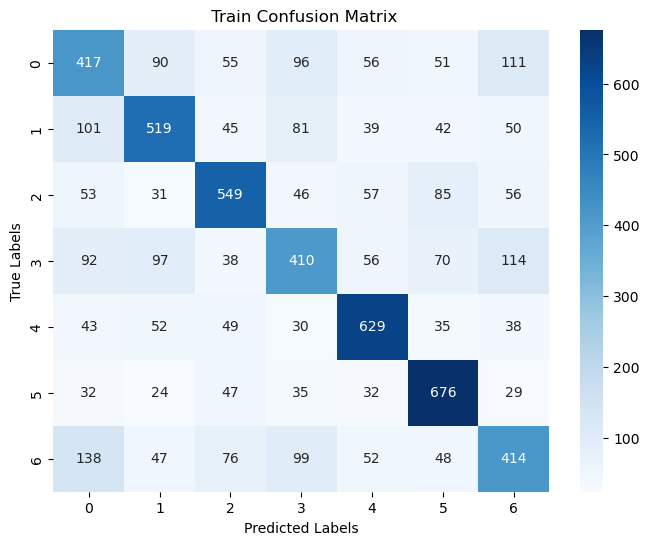

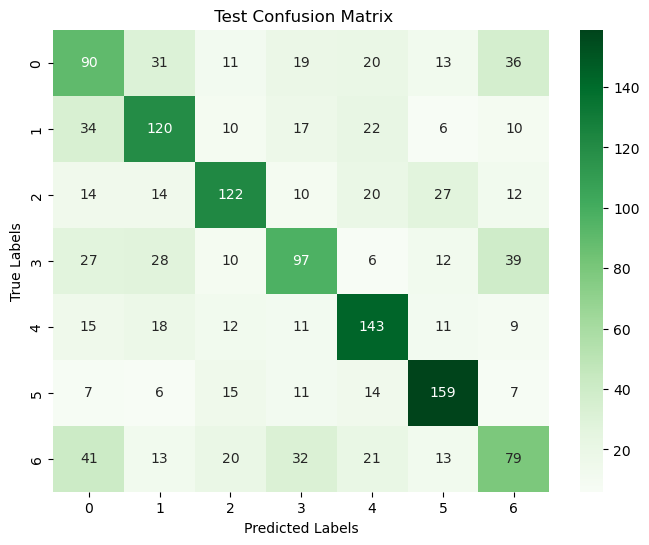

In [59]:
# Train a logistic regression model
Lr = LogisticRegression(multi_class='multinomial',solver="sag")
Lr.fit(X_train, y_train)


# Make predictions on the train set
y_pred = Lr.predict(X_train)
# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print('Train_Accuracy:', accuracy)
overAll_Train_accuracy.append(accuracy)
print("="*100)

# Calculate accuracy on Test Set
accuracy = accuracy_score(y_test, Lr.predict(X_test))
print('Test_Accuracy:', accuracy)
overAll_Test_accuracy.append(accuracy)
print("="*100)


#comfusion metric of Train set
cm = confusion_matrix(y_train, Lr.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, Lr.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()





<a id=3.2.4></a>
# 3.2.4: [DT & its performance Metrics](#1000)   


Train_Accuracy: 0.9871167645140247
Test_Accuracy: 0.26727509778357234


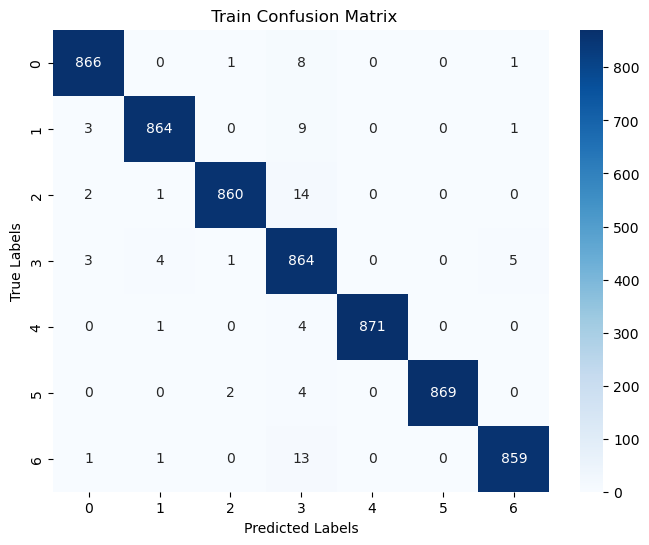

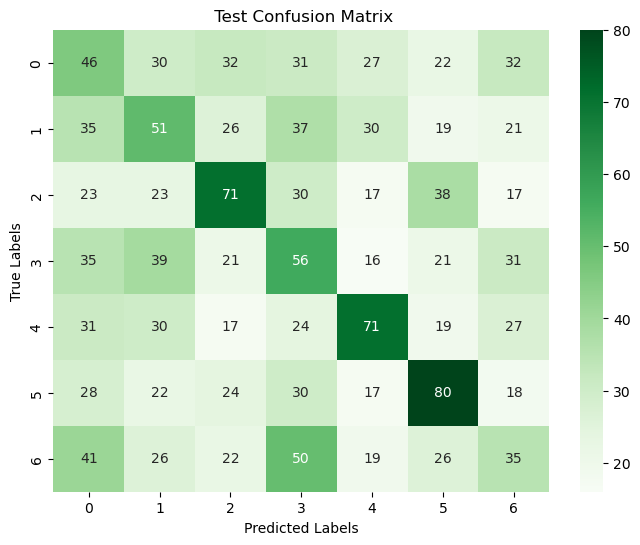

In [60]:

# Train a decision tree model
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)

# Make predictions on the Trainset
y_pred = Dt.predict(X_train)

# Calculate accuracy on Train Set
accuracy = accuracy_score(y_train, y_pred)
print('Train_Accuracy:', accuracy)
overAll_Train_accuracy.append(accuracy)
print("="*100)


# Calculate accuracy on Test Set
accuracy = accuracy_score(y_test, Dt.predict(X_test))
print('Test_Accuracy:', accuracy)
overAll_Test_accuracy.append(accuracy)

print("="*100)

#comfusion metric of Train set
cm = confusion_matrix(y_train, Dt.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, Dt.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


<a id=3.2.5></a>
# 3.2.5: [RF & its performance Metrics](#1000)


Train_Accuracy: 98.71167645140247
Test_Accuracy: 45.69752281616689


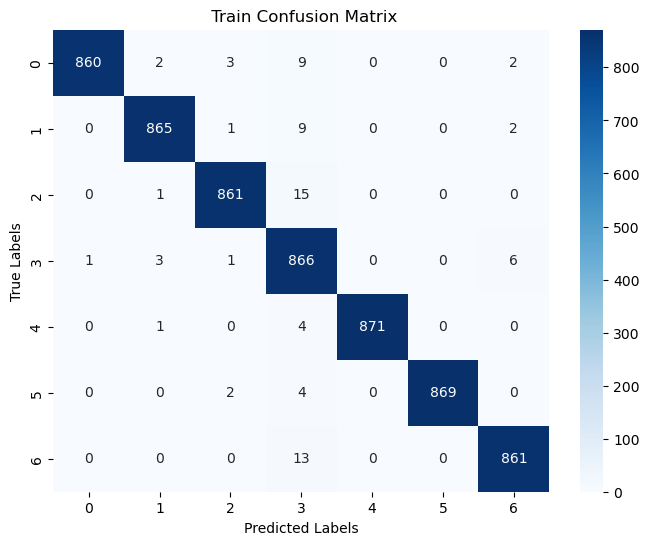

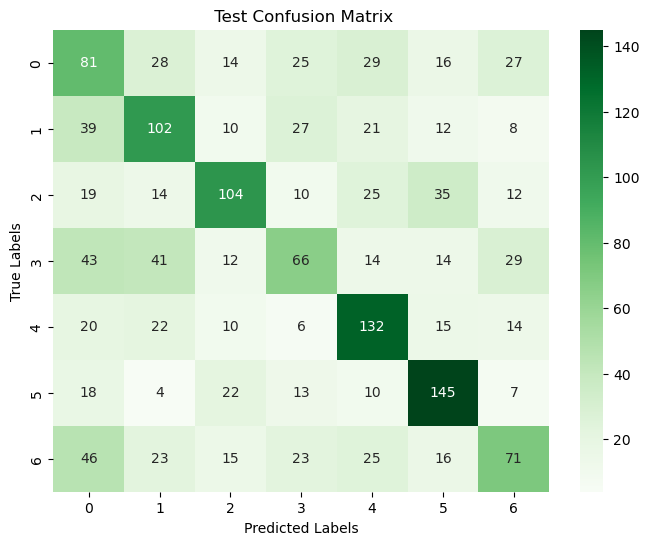

In [61]:
# Create the model
Rf = RandomForestClassifier()
# Train the model
Rf.fit(X_train, y_train)


# Evaluate the model's Train set accuracy
accuracy = accuracy_score(y_train, Rf.predict(X_train))
overAll_Train_accuracy.append(accuracy)
print("Train_Accuracy:", accuracy*100)

print("="*100)


# Evaluate the model's Test set accuracy
accuracy = accuracy_score(y_test, Rf.predict(X_test))
overAll_Test_accuracy.append(accuracy)
print("Test_Accuracy:", accuracy*100)

print("="*100)



#comfusion metric of Train set
cm = confusion_matrix(y_train, Rf.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, Rf.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


<a id=3.2.6></a>
# 3.2.6: [SVM & its performance Metrics](#1000)


Train Accuracy: 0.6112198303979126
Test_Accuracy: 0.5208604954367666


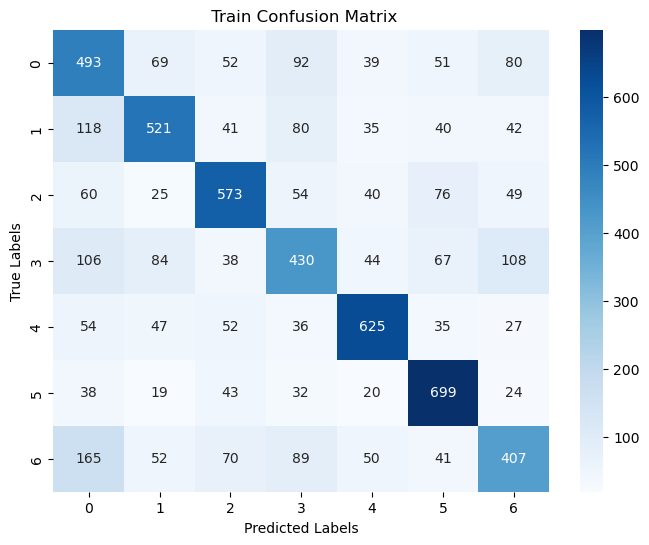

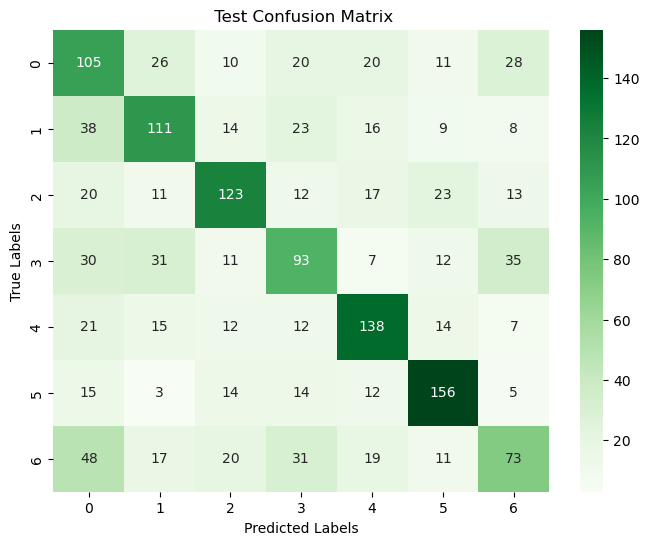

In [62]:


# Train an SVM model
Svm = SVC(kernel='linear')
Svm.fit(X_train, y_train)

# Make predictions on the train set
y_pred = Svm.predict(X_train)

# Calculate accuracy of Train Set
accuracy = accuracy_score(y_train, y_pred)
print('Train Accuracy:', accuracy)
overAll_Train_accuracy.append(accuracy)
print("="*100)

# Calculate accuracy of Test set.
accuracy = accuracy_score(y_test, Svm.predict(X_test))
print('Test_Accuracy:', accuracy)
overAll_Test_accuracy.append(accuracy)

print("="*100)




#comfusion metric of Train set
cm = confusion_matrix(y_train, Svm.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, Svm.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model on the training data
gb_model.fit(X_train, y_train)

y_tr=gb_model.predict(X_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

accuracy=accuracy_score(y_train,y_tr)

print("Train accuracy is:",accuracy)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Train accuracy is: 0.8038160469667319
Accuracy on the test set: 0.4908735332464146


In [26]:
import xgboost as xgb

# Create an XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the training data
y_tr = xgb_model.predict(X_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate training accuracy
accuracy_train = accuracy_score(y_train, y_tr)
print("Train accuracy is:", accuracy_train)

# Evaluate the model's performance on the test set
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy_test)


Train accuracy is: 0.9867906066536204
Accuracy on the test set: 0.5039113428943938


<a id=E></a>
# E: [accuracy chart--after Word2vec Vectorizer](#1000)

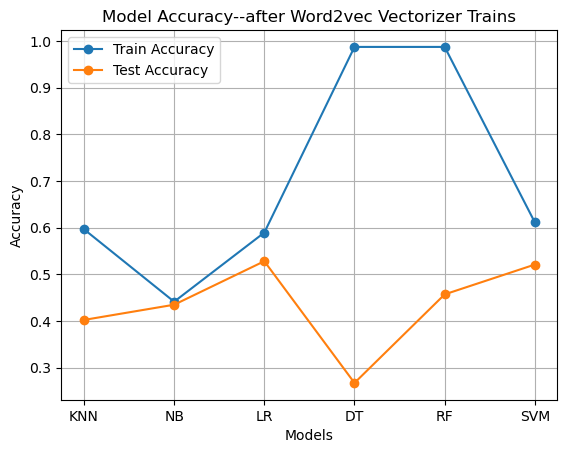

In [63]:
# Plotting the line chart
plt.plot(models, overAll_Train_accuracy, marker='o', label='Train Accuracy')
plt.plot(models, overAll_Test_accuracy, marker='o', label='Test Accuracy')

# Set the chart title and labels
plt.title('Model Accuracy--after Word2vec Vectorizer Trains')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(True)
# Add a legend
plt.legend()